In [201]:
import pandas as pd

In [203]:
df = pd.read_csv('../ML/NIDS_QISA.csv')

In [205]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0,0,Benign,NF-ToN-IoT-v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,192.168.100.149,46769,192.168.100.7,80,6,7.0,280,2,0,0,...,0,0,0,0,0,0,0,1,DoS,NF-BoT-IoT-v2
4995,192.168.100.147,38541,192.168.100.5,2033,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0,1,Reconnaissance,NF-BoT-IoT-v2
4996,192.168.100.148,22446,192.168.100.5,80,6,7.0,280,2,0,0,...,0,0,0,0,0,0,0,1,DoS,NF-BoT-IoT-v2
4997,197.248.161.170,54832,172.31.67.6,445,6,0.0,585,5,344,4,...,8192,0,0,0,0,0,0,0,Benign,NF-CSE-CIC-IDS2018-v2


In [193]:
df_kopi = df.copy()

In [207]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

In [209]:
# --- 1. Check labels ---
print("\nLabel column distribution:")
print(df['Label'].value_counts(dropna=False))

print("\nAttack column distribution:")
print(df['Attack'].value_counts(dropna=False))

# Class balance check
print("\nLabel balance (percentages):")
print(df['Label'].value_counts(normalize=True) * 100)

# --- 2. Missing values ---
print("\nMissing values per column (in %):")
print(df.isna().mean().sort_values(ascending=False) * 100)

# --- 3. Duplicates ---
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Label column distribution:
Label
1    3296
0    1703
Name: count, dtype: int64

Attack column distribution:
Attack
Benign            1703
DDoS              1410
DoS               1133
scanning           247
Reconnaissance     187
xss                164
password            62
injection           46
Bot                 15
Brute Force         15
Infilteration       11
Exploits             3
Fuzzers              2
Theft                1
Name: count, dtype: int64

Label balance (percentages):
Label
1    65.933187
0    34.066813
Name: proportion, dtype: float64

Missing values per column (in %):
IPV4_SRC_ADDR                  0.0
NUM_PKTS_1024_TO_1514_BYTES    0.0
RETRANSMITTED_IN_PKTS          0.0
RETRANSMITTED_OUT_BYTES        0.0
RETRANSMITTED_OUT_PKTS         0.0
SRC_TO_DST_AVG_THROUGHPUT      0.0
DST_TO_SRC_AVG_THROUGHPUT      0.0
NUM_PKTS_UP_TO_128_BYTES       0.0
NUM_PKTS_128_TO_256_BYTES      0.0
NUM_PKTS_256_TO_512_BYTES      0.0
NUM_PKTS_512_TO_1024_BYTES     0.0
TCP_WIN_MAX_IN   

In [211]:
print(df.iloc[0].to_dict())


{'IPV4_SRC_ADDR': '192.168.100.148', 'L4_SRC_PORT': 65389, 'IPV4_DST_ADDR': '192.168.100.7', 'L4_DST_PORT': 80, 'PROTOCOL': 6, 'L7_PROTO': 7.0, 'IN_BYTES': 420, 'IN_PKTS': 3, 'OUT_BYTES': 0, 'OUT_PKTS': 0, 'TCP_FLAGS': 2, 'CLIENT_TCP_FLAGS': 2, 'SERVER_TCP_FLAGS': 0, 'FLOW_DURATION_MILLISECONDS': 4293092, 'DURATION_IN': 1875, 'DURATION_OUT': 0, 'MIN_TTL': 64, 'MAX_TTL': 64, 'LONGEST_FLOW_PKT': 140, 'SHORTEST_FLOW_PKT': 140, 'MIN_IP_PKT_LEN': 0, 'MAX_IP_PKT_LEN': 140, 'SRC_TO_DST_SECOND_BYTES': 140280.0, 'DST_TO_SRC_SECOND_BYTES': 0.0, 'RETRANSMITTED_IN_BYTES': 140, 'RETRANSMITTED_IN_PKTS': 1, 'RETRANSMITTED_OUT_BYTES': 0, 'RETRANSMITTED_OUT_PKTS': 0, 'SRC_TO_DST_AVG_THROUGHPUT': 1120000, 'DST_TO_SRC_AVG_THROUGHPUT': 0, 'NUM_PKTS_UP_TO_128_BYTES': 0, 'NUM_PKTS_128_TO_256_BYTES': 3, 'NUM_PKTS_256_TO_512_BYTES': 0, 'NUM_PKTS_512_TO_1024_BYTES': 0, 'NUM_PKTS_1024_TO_1514_BYTES': 0, 'TCP_WIN_MAX_IN': 512, 'TCP_WIN_MAX_OUT': 0, 'ICMP_TYPE': 35840, 'ICMP_IPV4_TYPE': 140, 'DNS_QUERY_ID': 0, 'D

In [213]:
import numpy as np

# 1. Standardize protocol columns: convert numeric codes to string labels

# Protocol number to name mapping (common IP protocols)
protocol_map = {
    1: 'ICMP',
    6: 'TCP',
    17: 'UDP',
    # add more if needed
}

if 'PROTOCOL' in df.columns:
    df['PROTOCOL'] = df['PROTOCOL'].map(protocol_map).fillna('OTHER')

# You mentioned L7_PROTO is float, likely a code, let's convert to string for now
# If you have a mapping, use it; else convert numeric to string for consistency
df['L7_PROTO'] = df['L7_PROTO'].apply(lambda x: str(int(x)) if not pd.isna(x) else 'Unknown')

# 2. TCP Flags - convert numeric to hex string (common representation)
if 'TCP_FLAGS' in df.columns:
    # Convert numeric TCP flags to uppercase hex string, e.g. 2 -> '0x02'
    df['TCP_FLAGS'] = df['TCP_FLAGS'].apply(lambda x: format(int(x), '02X') if not pd.isna(x) else '00')

# Same for CLIENT_TCP_FLAGS and SERVER_TCP_FLAGS if present
for col in ['CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: format(int(x), '02X') if not pd.isna(x) else '00')

# 3. Protocol-specific fields masking (set irrelevant to NaN)
# DNS fields only valid if L7_PROTO == '7' (example from your data)
if 'L7_PROTO' in df.columns:
    is_dns = df['L7_PROTO'] == '7'
    dns_cols = [c for c in df.columns if c.startswith('DNS_')]
    for col in dns_cols:
        df.loc[~is_dns, col] = np.nan

# ICMP fields only valid if PROTOCOL == 'ICMP'
if 'PROTOCOL' in df.columns:
    is_icmp = df['PROTOCOL'] == 'ICMP'
    icmp_cols = [c for c in df.columns if c.startswith('ICMP')]
    for col in icmp_cols:
        df.loc[~is_icmp, col] = np.nan

# FTP_COMMAND_RET_CODE only valid if port 21 involved
if 'FTP_COMMAND_RET_CODE' in df.columns:
    is_ftp = (df['L4_DST_PORT'] == 21) | (df['L4_SRC_PORT'] == 21)
    df.loc[~is_ftp, 'FTP_COMMAND_RET_CODE'] = np.nan

# 4. Add protocol indicator columns for modeling convenience
df['is_dns_flow'] = (df['L7_PROTO'] == '7').astype(int)
df['is_icmp_flow'] = (df['PROTOCOL'] == 'ICMP').astype(int)
df['is_ftp_flow'] = ((df['L4_DST_PORT'] == 21) | (df['L4_SRC_PORT'] == 21)).astype(int)

print("✅ Step 2 done: protocols decoded, TCP flags formatted, irrelevant fields masked, indicators added.")


✅ Step 2 done: protocols decoded, TCP flags formatted, irrelevant fields masked, indicators added.


In [215]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset,is_dns_flow,is_icmp_flow,is_ftp_flow
0,192.168.100.148,65389,192.168.100.7,80,TCP,7,420,3,0,0,...,0.0,0.0,0.0,NaN,1,DoS,NF-BoT-IoT-v2,1,0,0
1,192.168.100.148,11154,192.168.100.5,80,TCP,7,280,2,40,1,...,0.0,0.0,0.0,NaN,1,DoS,NF-BoT-IoT-v2,1,0,0
2,192.168.1.31,42062,192.168.1.79,1041,TCP,0,44,1,40,1,...,NaN,NaN,NaN,NaN,0,Benign,NF-ToN-IoT-v2,0,0,0
3,192.168.1.34,46849,192.168.1.79,9110,TCP,0,44,1,40,1,...,NaN,NaN,NaN,NaN,0,Benign,NF-ToN-IoT-v2,0,0,0
4,192.168.1.30,50360,192.168.1.152,1084,TCP,0,44,1,40,1,...,NaN,NaN,NaN,NaN,0,Benign,NF-ToN-IoT-v2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,192.168.100.149,46769,192.168.100.7,80,TCP,7,280,2,0,0,...,0.0,0.0,0.0,NaN,1,DoS,NF-BoT-IoT-v2,1,0,0
4995,192.168.100.147,38541,192.168.100.5,2033,TCP,0,44,1,40,1,...,NaN,NaN,NaN,NaN,1,Reconnaissance,NF-BoT-IoT-v2,0,0,0
4996,192.168.100.148,22446,192.168.100.5,80,TCP,7,280,2,0,0,...,0.0,0.0,0.0,NaN,1,DoS,NF-BoT-IoT-v2,1,0,0
4997,197.248.161.170,54832,172.31.67.6,445,TCP,0,585,5,344,4,...,NaN,NaN,NaN,NaN,0,Benign,NF-CSE-CIC-IDS2018-v2,0,0,0


In [217]:
# =========================
# STEP 3 - FEATURE ENGINEERING
# =========================

# 1. Ratios: bytes and packets in/out
df['bytes_ratio_in_out'] = df['IN_BYTES'] / (df['OUT_BYTES'] + 1)  # avoid division by zero
df['pkts_ratio_in_out'] = df['IN_PKTS'] / (df['OUT_PKTS'] + 1)

# 2. Rates: bytes and packets per second (flow duration in seconds)
flow_duration_sec = df['FLOW_DURATION_MILLISECONDS'] / 1000.0
df['bytes_per_sec'] = (df['IN_BYTES'] + df['OUT_BYTES']) / (flow_duration_sec + 1)  # avoid div0
df['pkts_per_sec'] = (df['IN_PKTS'] + df['OUT_PKTS']) / (flow_duration_sec + 1)

# 3. Proportions of packet size buckets (normalize by total pkts in flow)
total_pkts = df['IN_PKTS'] + df['OUT_PKTS'] + 1  # avoid zero division
size_buckets = ['NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES',
                'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES']

for bucket in size_buckets:
    df[f'prop_{bucket.lower()}'] = df[bucket] / total_pkts

# 4. TTL range and retransmission ratios
df['ttl_range'] = df['MAX_TTL'] - df['MIN_TTL']
df['retransmit_bytes_ratio_in'] = df['RETRANSMITTED_IN_BYTES'] / (df['IN_BYTES'] + 1)
df['retransmit_pkts_ratio_in'] = df['RETRANSMITTED_IN_PKTS'] / (df['IN_PKTS'] + 1)
df['retransmit_bytes_ratio_out'] = df['RETRANSMITTED_OUT_BYTES'] / (df['OUT_BYTES'] + 1)
df['retransmit_pkts_ratio_out'] = df['RETRANSMITTED_OUT_PKTS'] / (df['OUT_PKTS'] + 1)

# 5. Flag common ports/services (HTTP=80, HTTPS=443, DNS=53, FTP=21)
common_ports = [21, 53, 80, 443]
for port in common_ports:
    df[f'flag_port_{port}'] = ((df['L4_DST_PORT'] == port) | (df['L4_SRC_PORT'] == port)).astype(int)

print("✅ Step 3 done: engineered ratios, rates, proportions, ttl range, retransmission ratios, port flags.")


✅ Step 3 done: engineered ratios, rates, proportions, ttl range, retransmission ratios, port flags.


In [219]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,prop_num_pkts_1024_to_1514_bytes,ttl_range,retransmit_bytes_ratio_in,retransmit_pkts_ratio_in,retransmit_bytes_ratio_out,retransmit_pkts_ratio_out,flag_port_21,flag_port_53,flag_port_80,flag_port_443
0,192.168.100.148,65389,192.168.100.7,80,TCP,7,420,3,0,0,...,0.0,0,0.332542,0.25,0.0,0.0,0,0,1,0
1,192.168.100.148,11154,192.168.100.5,80,TCP,7,280,2,40,1,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,1,0
2,192.168.1.31,42062,192.168.1.79,1041,TCP,0,44,1,40,1,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,0,0
3,192.168.1.34,46849,192.168.1.79,9110,TCP,0,44,1,40,1,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,0,0
4,192.168.1.30,50360,192.168.1.152,1084,TCP,0,44,1,40,1,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,192.168.100.149,46769,192.168.100.7,80,TCP,7,280,2,0,0,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,1,0
4995,192.168.100.147,38541,192.168.100.5,2033,TCP,0,44,1,40,1,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,0,0
4996,192.168.100.148,22446,192.168.100.5,80,TCP,7,280,2,0,0,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,1,0
4997,197.248.161.170,54832,172.31.67.6,445,TCP,0,585,5,344,4,...,0.0,0,0.000000,0.00,0.0,0.0,0,0,0,0


In [221]:
df['Attack'].unique()

array(['DoS', 'Benign', 'scanning', 'DDoS', 'xss', 'Bot',
       'Reconnaissance', 'password', 'Fuzzers', 'injection', 'Theft',
       'Brute Force', 'Infilteration', 'Exploits'], dtype=object)

In [223]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# --- One-hot encode small categories ---

# PROTOCOL and L7_PROTO are strings now
one_hot_cols = ['PROTOCOL', 'L7_PROTO']

df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

# --- Map large categories ---

# Function to map port to group
def port_group(port):
    if port in range(0, 1024):
        return 'well_known'
    elif port in range(1024, 49152):
        return 'registered'
    elif port in range(49152, 65536):
        return 'dynamic'
    else:
        return 'unknown'

df['SRC_PORT_GROUP'] = df['L4_SRC_PORT'].apply(port_group)
df['DST_PORT_GROUP'] = df['L4_DST_PORT'].apply(port_group)

# One-hot encode port groups
df = pd.get_dummies(df, columns=['SRC_PORT_GROUP', 'DST_PORT_GROUP'], prefix=['SRC_PORT', 'DST_PORT'])

# --- IP grouping example (simple internal vs external) ---

def ip_group(ip):
    # Internal IP ranges simplified (private IPs)
    private_ranges = [
        ('10.', '10.255.255.255'),
        ('172.16.', '172.31.255.255'),
        ('192.168.', '192.168.255.255')
    ]
    for prefix, _ in private_ranges:
        if ip.startswith(prefix):
            return 'internal'
    return 'external'

df['SRC_IP_GROUP'] = df['IPV4_SRC_ADDR'].apply(ip_group)
df['DST_IP_GROUP'] = df['IPV4_DST_ADDR'].apply(ip_group)

# One-hot encode IP groups
df = pd.get_dummies(df, columns=['SRC_IP_GROUP', 'DST_IP_GROUP'], prefix=['SRC_IP', 'DST_IP'])

print("✅ Step 4 done: categorical variables one-hot encoded and grouped.")


✅ Step 4 done: categorical variables one-hot encoded and grouped.


In [227]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target
X = df.drop(columns=['Label', 'Attack', 'Dataset', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'])
y = df['Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate scale_pos_weight for LightGBM
pos = sum(y_train == 1)
neg = sum(y_train == 0)
scale_pos_weight = neg / pos

# Prepare datasets for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'scale_pos_weight': scale_pos_weight,
    'verbose': -1,
    'seed': 42
}

# Train model
#model = lgb.train(params, train_data, valid_sets=[test_data], early_stopping_rounds=50, verbose_eval=20)
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)


# Predict & evaluate
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.078653
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       341
           1       0.99      0.98      0.99       659

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Matrix:
 [[333   8]
 [ 11 648]]


In [ ]:
!pip install lightgbm


In [ ]:
!pip install --upgrade lightgbm


In [225]:
# Check unique values to understand format
print(df['TCP_FLAGS'].unique())

# Convert to numeric if possible
df['TCP_FLAGS'] = pd.to_numeric(df['TCP_FLAGS'], errors='coerce')
df['CLIENT_TCP_FLAGS'] = pd.to_numeric(df['CLIENT_TCP_FLAGS'], errors='coerce')
df['SERVER_TCP_FLAGS'] = pd.to_numeric(df['SERVER_TCP_FLAGS'], errors='coerce')

# After conversion, check for NaNs and fill or drop
print(df[['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']].isna().sum())

# Fill NaNs if any (e.g., with 0)
df[['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']] = df[['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']].fillna(0)


['02' '16' 'D6' '1F' '1E' '00' '1B' 'DF' 'DB' '13' '12' 'DE' 'D3' '17'
 '18' '10' '1C' '1A' '11' '14' '19' 'D2' '04' '1D' '52' '29' 'C2' '06'
 '15']
TCP_FLAGS           980
CLIENT_TCP_FLAGS    967
SERVER_TCP_FLAGS    942
dtype: int64


In [158]:
df_copy = df.copy()


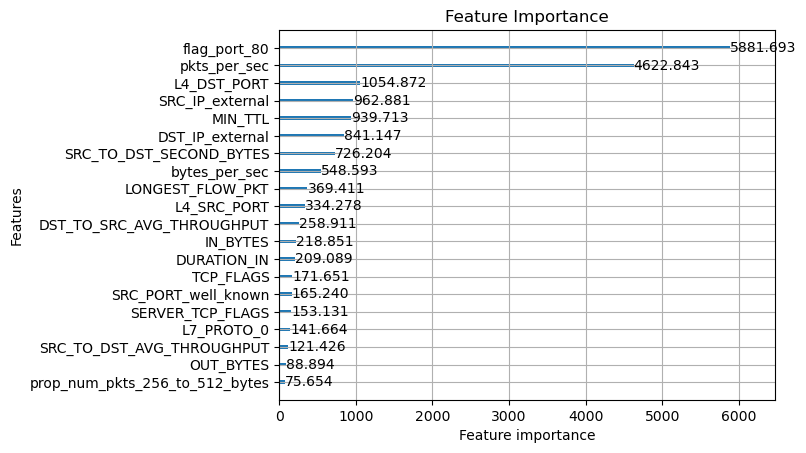

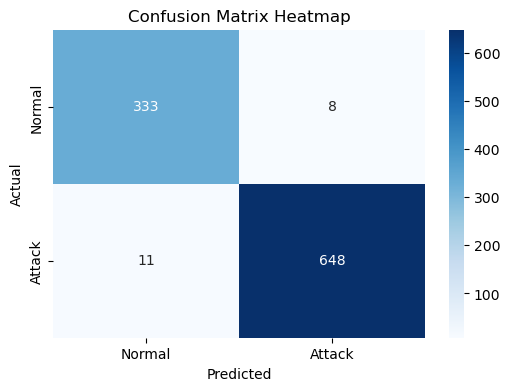

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import confusion_matrix

# Feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Feature Importance")
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


Top 2 features: ['pkts_per_sec', 'flag_port_80']


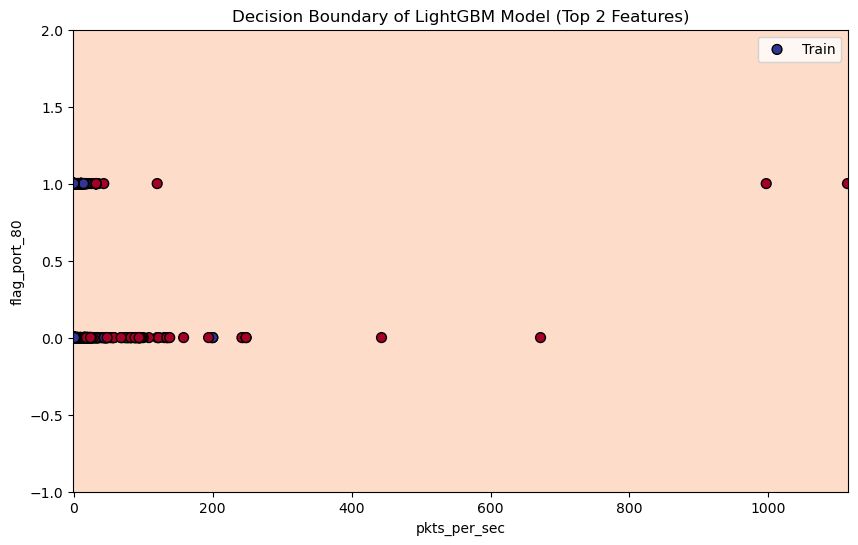

In [231]:
import numpy as np
import matplotlib.pyplot as plt

# Get top 2 features by importance
importance = model.feature_importance(importance_type='gain')
feature_names = X_train.columns
top2_idx = np.argsort(importance)[-2:]
top2_features = feature_names[top2_idx]

print("Top 2 features:", top2_features.tolist())

# Subset training and testing data for these two features
X_train_2 = X_train[top2_features]
X_test_2 = X_test[top2_features]

# Create a mesh grid over feature space
x_min, x_max = X_train_2.iloc[:,0].min() - 1, X_train_2.iloc[:,0].max() + 1
y_min, y_max = X_train_2.iloc[:,1].min() - 1, X_train_2.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
# We need to prepare grid_points in the full feature space (fill other features with median)
X_grid = pd.DataFrame(np.tile(X_train.median().values, (grid_points.shape[0], 1)), columns=X_train.columns)
X_grid[top2_features[0]] = grid_points[:,0]
X_grid[top2_features[1]] = grid_points[:,1]

probs = model.predict(X_grid)
Z = (probs >= 0.5).astype(int).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot train points
plt.scatter(X_train_2.iloc[:,0], X_train_2.iloc[:,1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=50, label='Train')

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title('Decision Boundary of LightGBM Model (Top 2 Features)')
plt.legend()
plt.show()


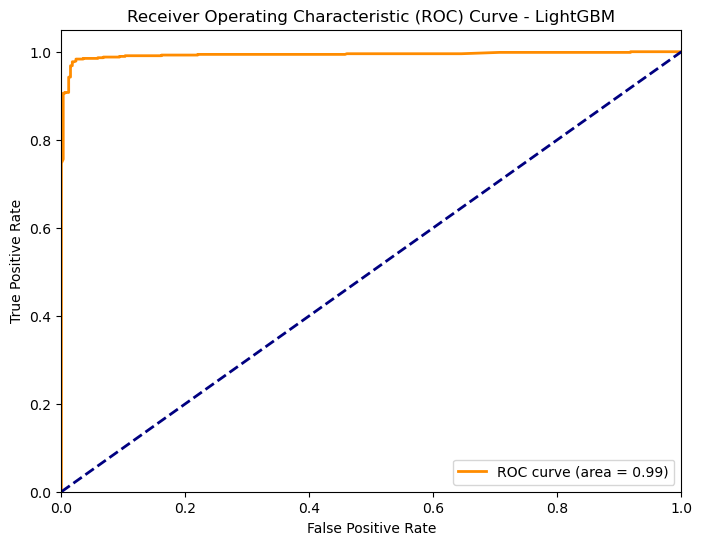

In [233]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and ROC area for the model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()



In [251]:
import pandas as pd

# Your input as a dict with feature names as keys, values as single-element lists
sample_data = {
    'PROTOCOL': [17],
    'L7_PROTO': [0],
    'IN_BYTES': [70],
    'IN_PKTS': [1],
    'OUT_BYTES': [130],
    'OUT_PKTS': [1],
    'TCP_FLAGS': [0],
    'CLIENT_TCP_FLAGS': [0],
    'SERVER_TCP_FLAGS': [0],
    'FLOW_DURATION_MILLISECONDS': [0],
    'DURATION_IN': [0],
    'DURATION_OUT': [0],
    'MIN_TTL': [128],
    'MAX_TTL': [128],
    'LONGEST_FLOW_PKT': [130],
    'SHORTEST_FLOW_PKT': [70],
    'MIN_IP_PKT_LEN': [70],
    'MAX_IP_PKT_LEN': [130],
    'SRC_TO_DST_SECOND_BYTES': [140],
    'DST_TO_SRC_SECOND_BYTES': [260],
    'RETRANSMITTED_IN_BYTES': [0],
    'RETRANSMITTED_IN_PKTS': [0],
    'RETRANSMITTED_OUT_BYTES': [0],
    'RETRANSMITTED_OUT_PKTS': [0],
    'SRC_TO_DST_AVG_THROUGHPUT': [1120000],
    'DST_TO_SRC_AVG_THROUGHPUT': [1560000],
    'NUM_PKTS_UP_TO_128_BYTES': [2],
    'NUM_PKTS_128_TO_256_BYTES': [2],
    'NUM_PKTS_256_TO_512_BYTES': [0],
    'NUM_PKTS_512_TO_1024_BYTES': [0],
    'NUM_PKTS_1024_TO_1514_BYTES': [0],
    'TCP_WIN_MAX_IN': [0],
    'TCP_WIN_MAX_OUT': [0],
    'ICMP_TYPE': [0],
    'ICMP_IPV4_TYPE': [0],
    'DNS_QUERY_ID': [0],
    'DNS_QUERY_TYPE': [31407],
    'DNS_TTL_ANSWER': [1],
}

X_new = pd.DataFrame(sample_data)


In [259]:
def preprocess_network_data(df_raw):
    df = df_raw.copy()

    protocol_map = {1: 'ICMP', 6: 'TCP', 17: 'UDP'}
    if 'PROTOCOL' in df.columns:
        df['PROTOCOL'] = df['PROTOCOL'].map(protocol_map).fillna('OTHER')

    if 'L7_PROTO' in df.columns:
        df['L7_PROTO'] = df['L7_PROTO'].apply(lambda x: str(int(x)) if not pd.isna(x) else 'Unknown')

    for col in ['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: format(int(x), '02X') if not pd.isna(x) else '00')

    if 'L7_PROTO' in df.columns:
        is_dns = df['L7_PROTO'] == '7'
        dns_cols = [c for c in df.columns if c.startswith('DNS_')]
        for col in dns_cols:
            df.loc[~is_dns, col] = np.nan

    if 'PROTOCOL' in df.columns:
        is_icmp = df['PROTOCOL'] == 'ICMP'
        icmp_cols = [c for c in df.columns if c.startswith('ICMP')]
        for col in icmp_cols:
            df.loc[~is_icmp, col] = np.nan

    # Since 'L4_DST_PORT' and 'L4_SRC_PORT' missing, skip FTP_COMMAND_RET_CODE and port flags

    # Add protocol indicator columns:
    df['is_dns_flow'] = (df['L7_PROTO'] == '7').astype(int) if 'L7_PROTO' in df.columns else 0
    df['is_icmp_flow'] = (df['PROTOCOL'] == 'ICMP').astype(int) if 'PROTOCOL' in df.columns else 0
    df['is_ftp_flow'] = 0  # Cannot detect FTP without ports

    # Feature engineering that doesn't rely on missing columns
    if ('IN_BYTES' in df.columns) and ('OUT_BYTES' in df.columns):
        df['bytes_ratio_in_out'] = df['IN_BYTES'] / (df['OUT_BYTES'] + 1)
    if ('IN_PKTS' in df.columns) and ('OUT_PKTS' in df.columns):
        df['pkts_ratio_in_out'] = df['IN_PKTS'] / (df['OUT_PKTS'] + 1)

    if ('FLOW_DURATION_MILLISECONDS' in df.columns) and ('IN_BYTES' in df.columns) and ('OUT_BYTES' in df.columns):
        flow_duration_sec = df['FLOW_DURATION_MILLISECONDS'] / 1000.0
        df['bytes_per_sec'] = (df['IN_BYTES'] + df['OUT_BYTES']) / (flow_duration_sec + 1)
    if ('FLOW_DURATION_MILLISECONDS' in df.columns) and ('IN_PKTS' in df.columns) and ('OUT_PKTS' in df.columns):
        flow_duration_sec = df['FLOW_DURATION_MILLISECONDS'] / 1000.0
        df['pkts_per_sec'] = (df['IN_PKTS'] + df['OUT_PKTS']) / (flow_duration_sec + 1)

    total_pkts = df['IN_PKTS'] + df['OUT_PKTS'] + 1 if ('IN_PKTS' in df.columns and 'OUT_PKTS' in df.columns) else None
    size_buckets = ['NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES',
                    'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES']
    if total_pkts is not None:
        for bucket in size_buckets:
            if bucket in df.columns:
                df[f'prop_{bucket.lower()}'] = df[bucket] / total_pkts

    if ('MAX_TTL' in df.columns) and ('MIN_TTL' in df.columns):
        df['ttl_range'] = df['MAX_TTL'] - df['MIN_TTL']

    # Retransmission ratios if columns exist
    if all(c in df.columns for c in ['RETRANSMITTED_IN_BYTES', 'IN_BYTES']):
        df['retransmit_bytes_ratio_in'] = df['RETRANSMITTED_IN_BYTES'] / (df['IN_BYTES'] + 1)
    if all(c in df.columns for c in ['RETRANSMITTED_IN_PKTS', 'IN_PKTS']):
        df['retransmit_pkts_ratio_in'] = df['RETRANSMITTED_IN_PKTS'] / (df['IN_PKTS'] + 1)
    if all(c in df.columns for c in ['RETRANSMITTED_OUT_BYTES', 'OUT_BYTES']):
        df['retransmit_bytes_ratio_out'] = df['RETRANSMITTED_OUT_BYTES'] / (df['OUT_BYTES'] + 1)
    if all(c in df.columns for c in ['RETRANSMITTED_OUT_PKTS', 'OUT_PKTS']):
        df['retransmit_pkts_ratio_out'] = df['RETRANSMITTED_OUT_PKTS'] / (df['OUT_PKTS'] + 1)

    # Skip port grouping and IP grouping as those columns missing

    # One-hot encode PROTOCOL and L7_PROTO if exist
    one_hot_cols = []
    if 'PROTOCOL' in df.columns:
        one_hot_cols.append('PROTOCOL')
    if 'L7_PROTO' in df.columns:
        one_hot_cols.append('L7_PROTO')

    if one_hot_cols:
        df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

    return df


In [263]:
# Assume new_data is a DataFrame with **raw** columns from the CSV or input

new_data_processed = preprocess_network_data(X_new)

# Drop unused columns like training
X_new = new_data_processed.drop(columns=['Label', 'Attack', 'Dataset', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], errors='ignore')

# Align columns with training set columns (fill missing cols with 0)
missing_cols = set(X_train.columns) - set(X_new.columns)
for col in missing_cols:
    X_new[col] = 0
X_new = X_new[X_train.columns]  # reorder columns exactly as training
# Make sure columns match training order:
X_new = X_new[X_train.columns]

# Convert TCP flags columns from hex string back to int if needed
for col in ['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']:
    if col in X_new.columns:
        X_new[col] = X_new[col].apply(lambda x: int(x, 16) if isinstance(x, str) else int(x))

# Now predict
y_pred_prob = model.predict(X_new)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Prediction:", y_pred)


Prediction: [0]


In [265]:
import pandas as pd
from io import StringIO

data = """
192.168.100.149 31222 192.168.100.5 80 6 7 280 2 0 0 2 2 0 4293654 1313 0 64 64 140 140 0 140 140140 0 0 0 0 0 1120000 0 0 2 0 0 0 512 0 0 0 0 0 0 0 1 DoS NF-BoT-IoT-v2
192.168.100.149 43618 192.168.100.5 80 17 188 56 2 0 0 0 0 0 4294326 641 0 64 64 28 28 0 28 2828 0 0 0 0 0 224000 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 DDoS NF-BoT-IoT-v2
172.31.65.79 49482 23.21.76.148 443 6 91.178 595 7 468 7 31 31 27 0 0 0 128 128 261 40 40 261 595 468 0 0 0 0 4760000 3744000 12 1 1 0 0 8192 29200 0 0 0 0 0 0 0 Benign NF-CSE-CIC-IDS2018-v2
192.168.1.31 35313 192.168.1.46 5051 6 0 44 1 0 0 2 2 0 0 0 0 0 0 44 44 0 44 44 0 0 0 0 0 352000 0 1 0 0 0 0 1024 0 0 0 0 0 0 0 0 Benign NF-ToN-IoT-v2
"""

# Columns you gave
columns = [
    'IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
    'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL',
    'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
    'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT',
    'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
    'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
    'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'
]

# Read from string using whitespace separator
df_new = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=columns)

print(df_new)


     IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0  192.168.100.149        31222  192.168.100.5           80         6   
1  192.168.100.149        43618  192.168.100.5           80        17   
2     172.31.65.79        49482   23.21.76.148          443         6   
3     192.168.1.31        35313   192.168.1.46         5051         6   

   L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  ...  TCP_WIN_MAX_OUT  \
0     7.000       280        2          0         0  ...                0   
1   188.000        56        2          0         0  ...                0   
2    91.178       595        7        468         7  ...            29200   
3     0.000        44        1          0         0  ...                0   

   ICMP_TYPE  ICMP_IPV4_TYPE  DNS_QUERY_ID  DNS_QUERY_TYPE  DNS_TTL_ANSWER  \
0          0               0             0               0               0   
1          0               0             0               0               0   
2          0  

In [269]:
new_data_processed = preprocess_network_data(df_new)

# Drop unused columns like training
df_new = new_data_processed.drop(columns=['Label', 'Attack', 'Dataset', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], errors='ignore')

# Align columns with training set columns (fill missing cols with 0)
missing_cols = set(X_train.columns) - set(df_new.columns)
for col in missing_cols:
    df_new[col] = 0
df_new = df_new[X_train.columns]  # reorder columns exactly as training
# Make sure columns match training order:
df_new = df_new[X_train.columns]

# Convert TCP flags columns from hex string back to int if needed
for col in ['TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS']:
    if col in df_new.columns:
        df_new[col] = df_new[col].apply(lambda x: int(x, 16) if isinstance(x, str) else int(x))

# Now predict
y_pred_prob = model.predict(df_new)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Prediction:", y_pred)

Prediction: [1 1 1 0]


NameError: name 'df' is not defined